In [1]:
%run ./../imports.ipynb

/var/folders/6f/t4h9gbkd0cv20rj0_w5p5gxc0000gn/T/ipykernel_61224/844995121.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Imports finished! :D


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# Define the parameters
a = 2.0
aa = 1.0
bb = 1.0
cc = 1.0

N = 500

# Define the x and y coordinates
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
x, y = np.meshgrid(x, y)

# Define the functions
u = np.sin(np.pi * x * a) * np.cos(np.pi * y * a)
dux = np.gradient(u, axis=0)
duy = np.gradient(u, axis=1)
k = aa + bb * u + cc * u * u
qx = - dux * k
qy = - duy * k


# Calculate f
f = np.gradient(qx, axis=0) + np.gradient(qy, axis=1)


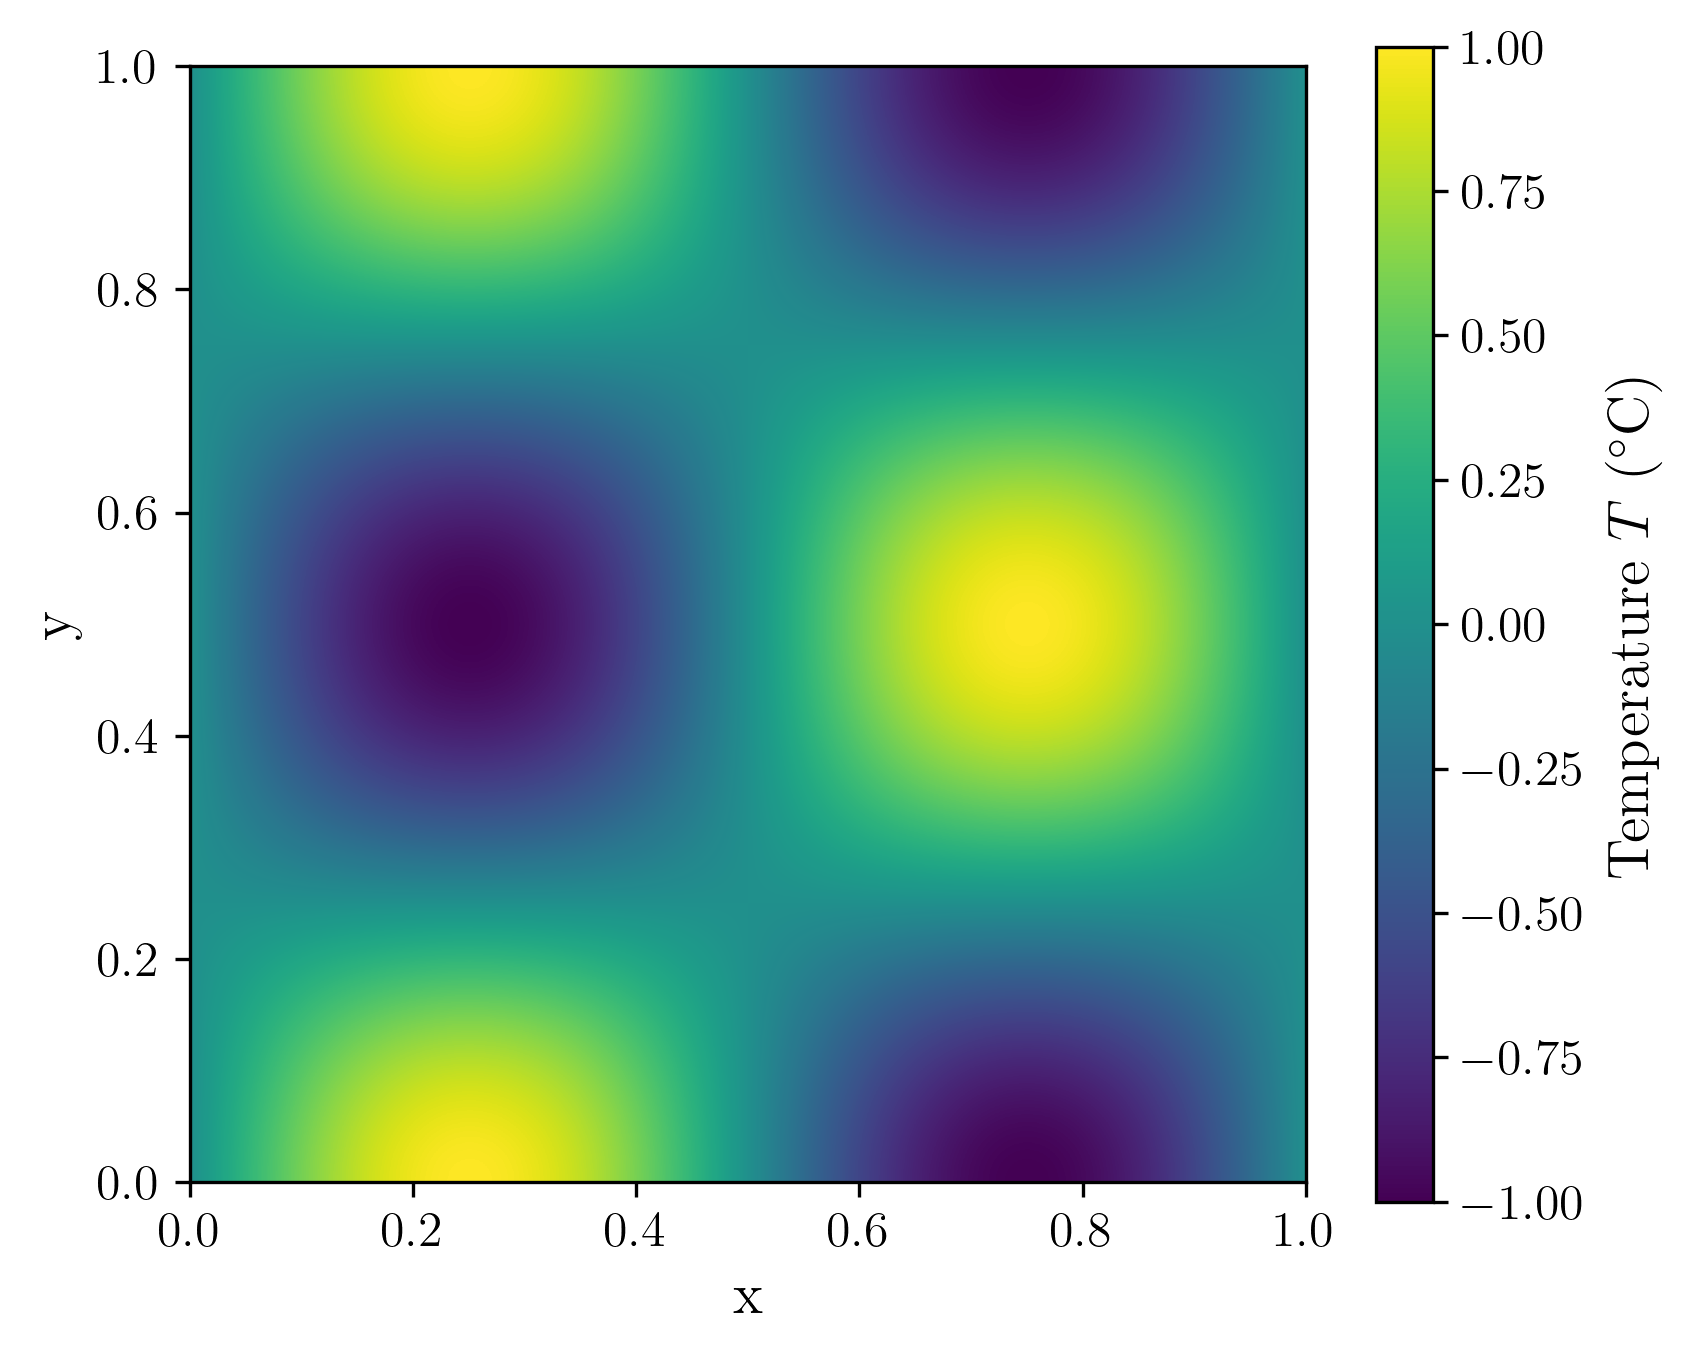

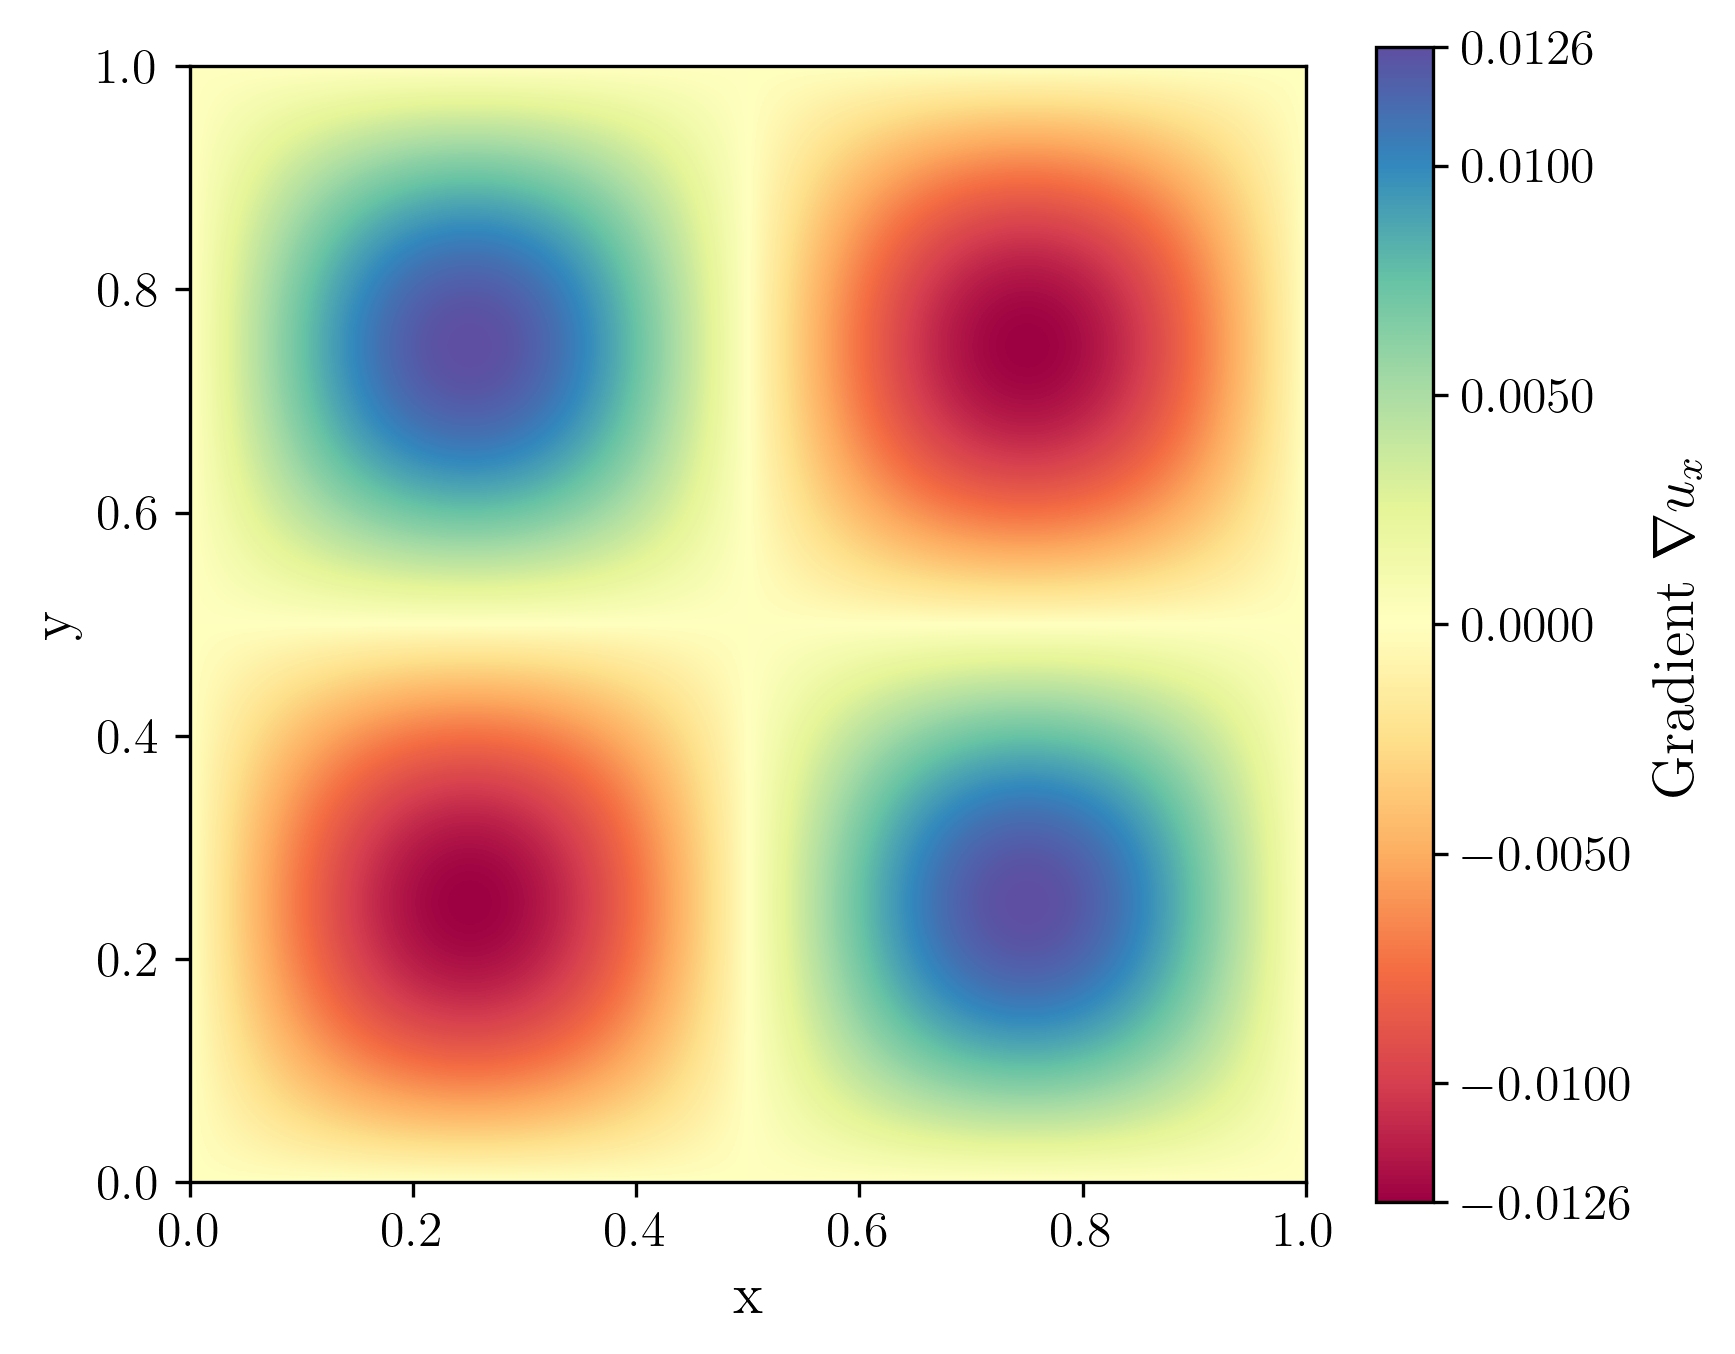

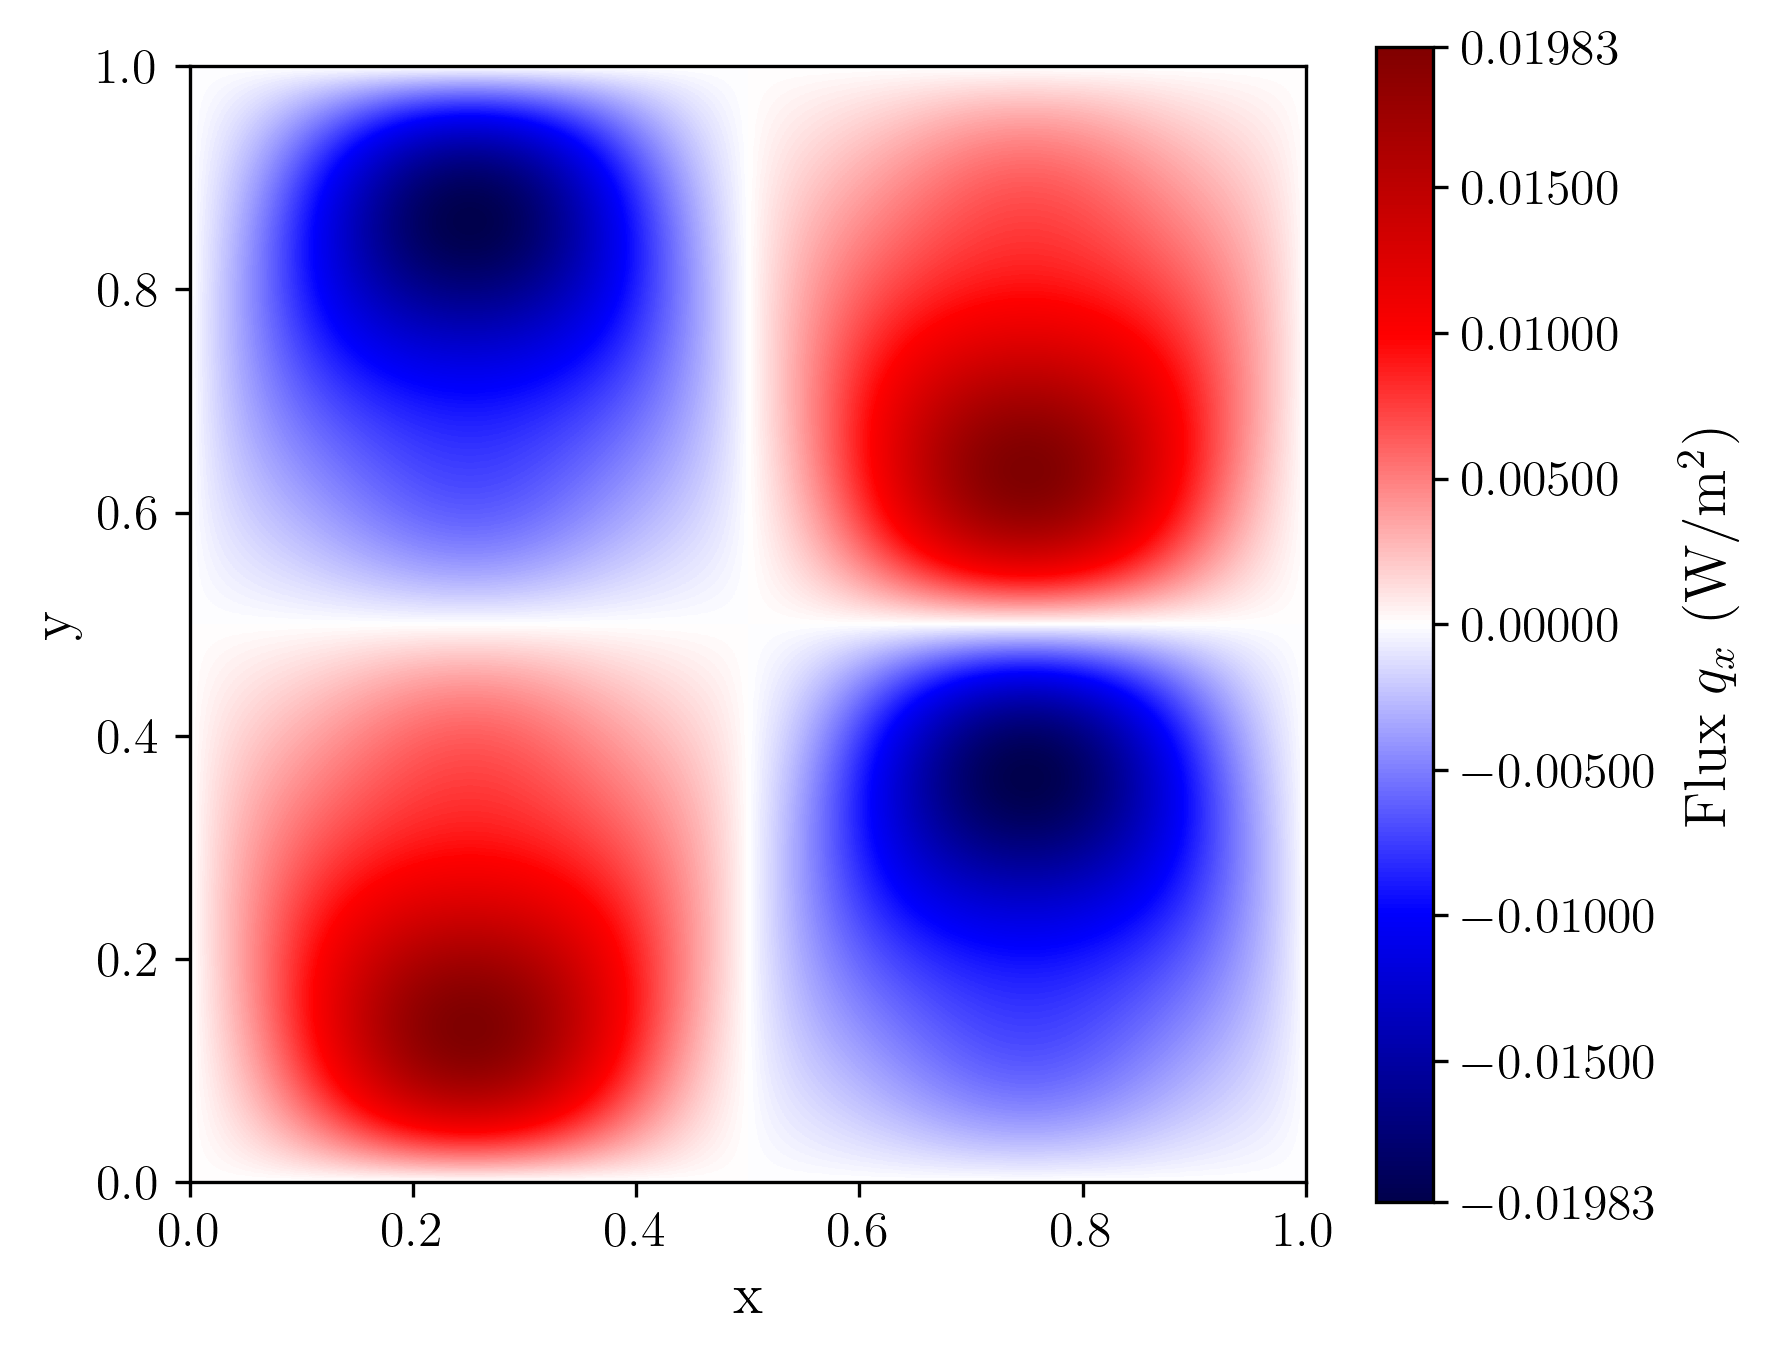

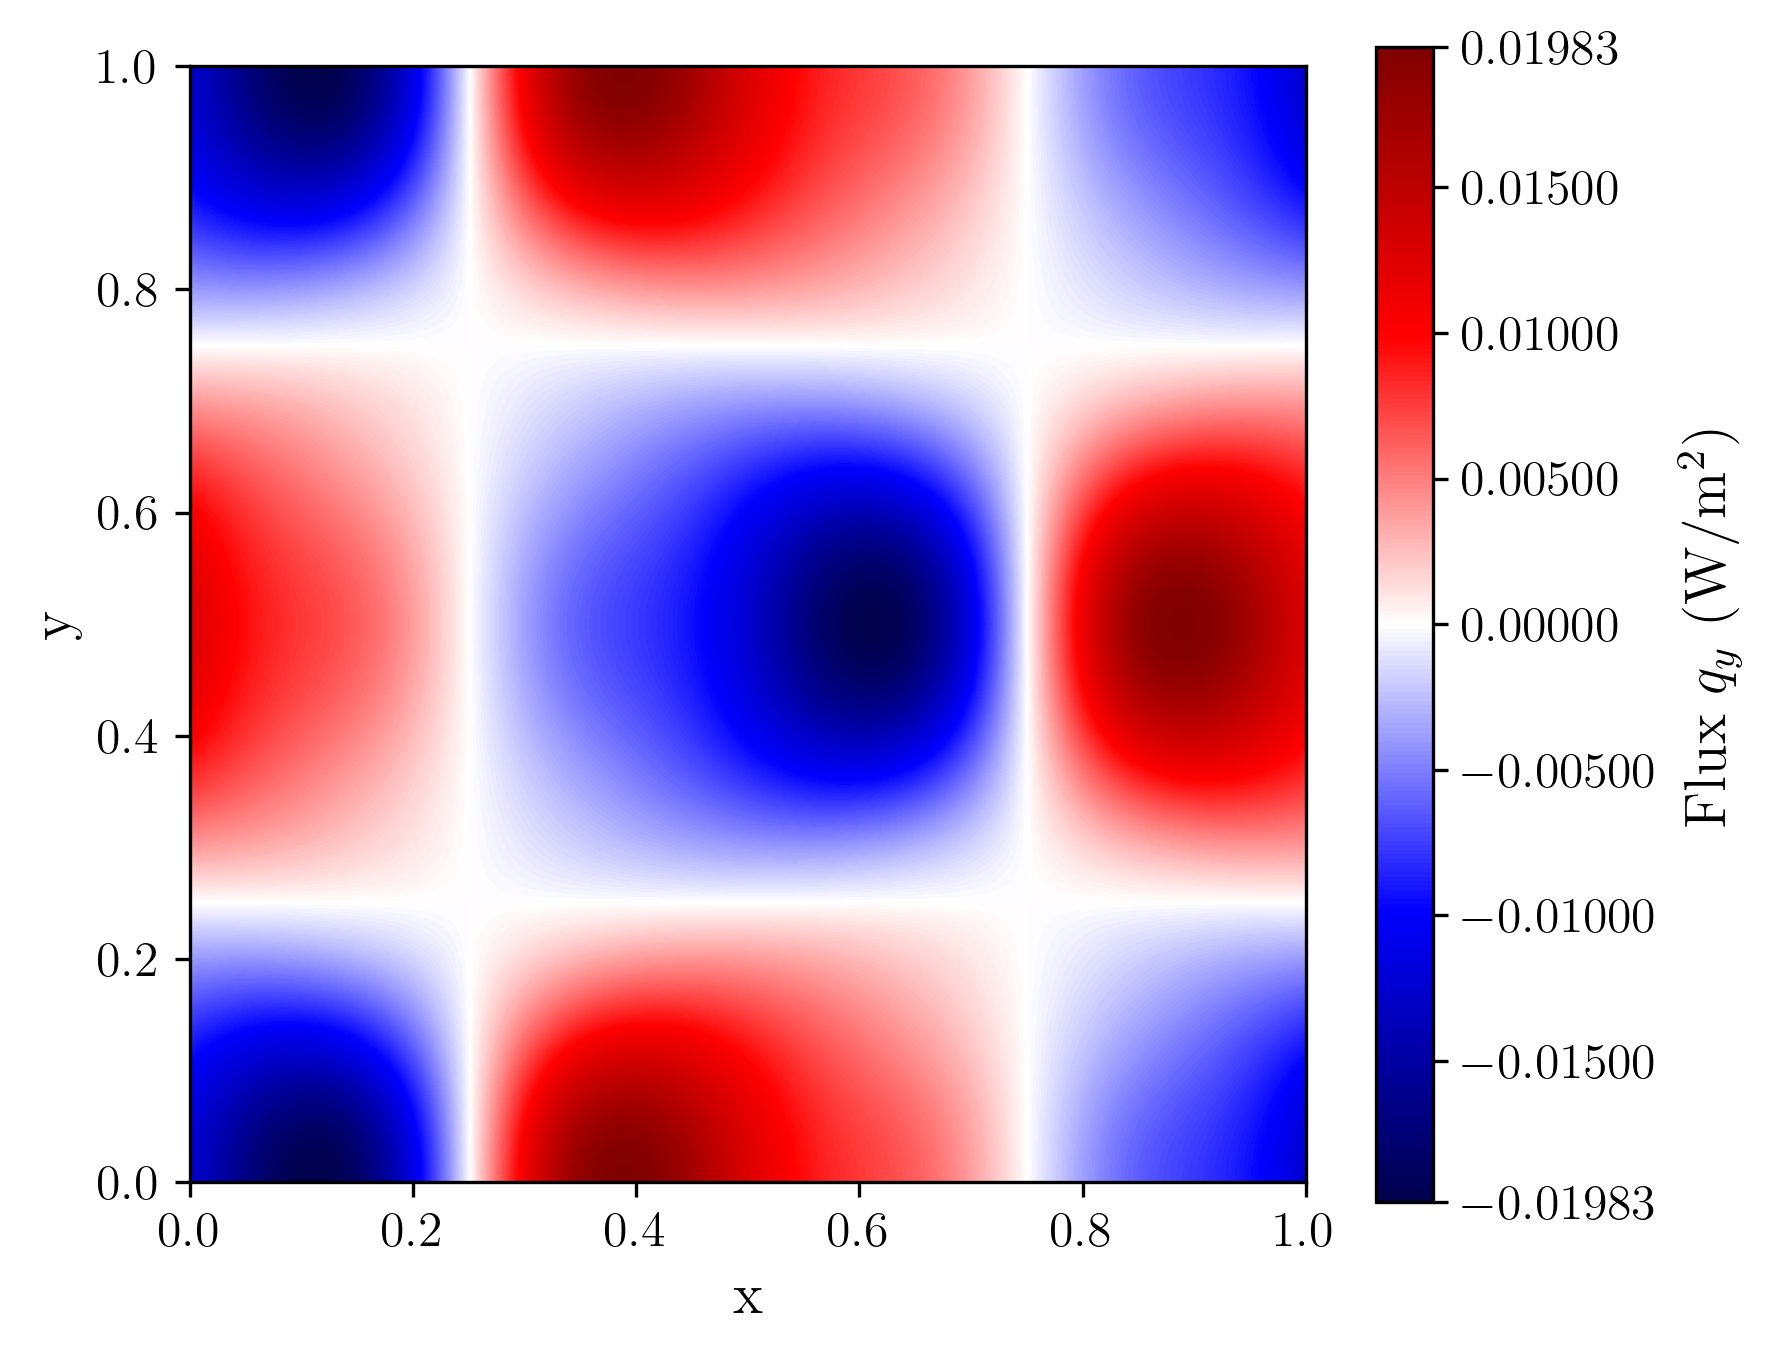

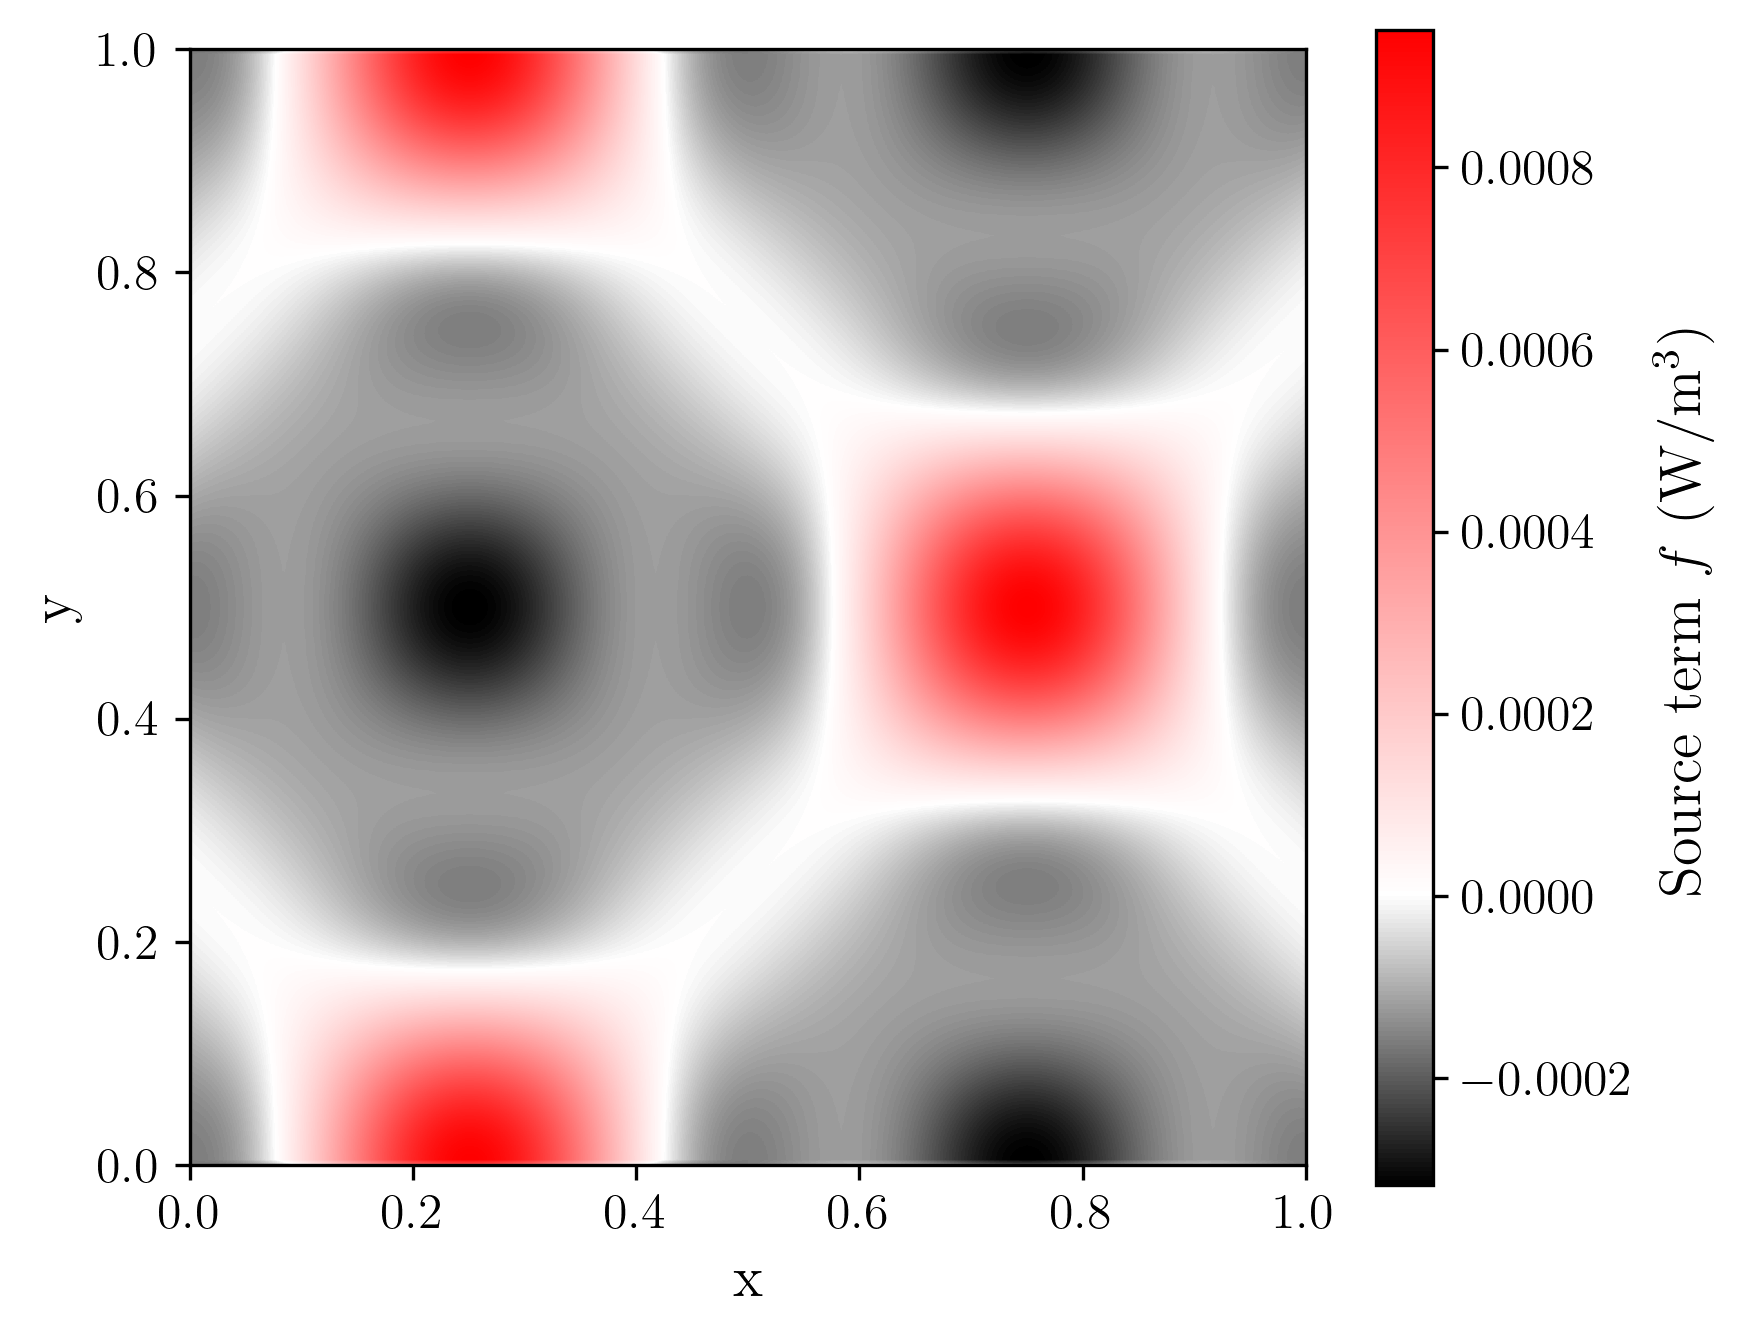

In [3]:
# import matplotlib.pyplot as plt
# import numpy as np

def plot_data(data, cbar_label, cmap='viridis'):
    plt.figure(figsize=(6, 5))
    img = plt.imshow(data, extent=[0, 1, 0, 1], origin='lower', cmap=cmap)
    cbar = plt.colorbar(img)
    cbar.set_label(cbar_label)

    # Get default ticks
    default_ticks = cbar.get_ticks()

    # Add min and max to default ticks
    ticks = np.append([data.min(), data.max()], default_ticks)

    # Ensure unique values only and within range
    ticks = np.unique(ticks[(ticks >= data.min()) & (ticks <= data.max())])

    cbar.set_ticks(ticks)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_data_zero_white(data, cbar_label, min_color='black', max_color='red'):
    # Convert color names to RGB
    min_color_rgb = mcolors.to_rgb(min_color)
    max_color_rgb = mcolors.to_rgb(max_color)

    # Create a colormap that goes through white at zero
    min_val = data.min()
    max_val = data.max()
    mid_val = 0

    # Create a dictionary for the LinearSegmentedColormap
    cdict = {'red':   [(0.0,  min_color_rgb[0], min_color_rgb[0]),
                       (abs(min_val)/(max_val-min_val),  1.0, 1.0),
                       (1.0,  max_color_rgb[0], max_color_rgb[0])],

             'green': [(0.0,  min_color_rgb[1], min_color_rgb[1]),
                       (abs(min_val)/(max_val-min_val), 1.0, 1.0),
                       (1.0,  max_color_rgb[1], max_color_rgb[1])],

             'blue':  [(0.0,  min_color_rgb[2], min_color_rgb[2]),
                       (abs(min_val)/(max_val-min_val),  1.0, 1.0),
                       (1.0,  max_color_rgb[2], max_color_rgb[2])]}

    cmap = mcolors.LinearSegmentedColormap('my_colormap', cdict, 256)

    plt.figure(figsize=(6, 5))
    img = plt.imshow(data, extent=[0, 1, 0, 1], origin='lower', cmap=cmap)
    cbar = plt.colorbar(img)
    cbar.set_label(cbar_label)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Usage:
plot_data(u, r'Temperature $T$ ($^\circ$C)')
plot_data(dux, r'Gradient $\nabla u_x$', cmap='Spectral')
plot_data(qx, r'Flux $q_x$ (W/m$^2$)', cmap='seismic')
plot_data(qy, r'Flux $q_y$ (W/m$^2$)', cmap='seismic')
plot_data_zero_white(f, r'Source term $f$ (W/m$^3$)', min_color='black', max_color='red')